# Lab 4.06 - Bivariate Analysis of Qualitative Data


In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

In [3]:
df = pd.read_csv('../data/MuziekWijn.csv')
df.head()

,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse


## Exercise 6 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

The research data can be found in the file data/MuziekWijn.csv.

1. Set up the correct crosstab.
2. Determine the marginal totals.
3. Determine the expected results.
4. Calculate the χ² test statistic.
5. Calculate Cramér's V. What can you conclude from this?

Visualize the data set:

1. Plot a bar chart showing the percentages of types of wine sold when no music was playing.
2. Plot a clustered bar chart of the dataset
3. Plot a bar chart (stacked bar chart) of the dataset

Results of the main calculations (rounded up to 3 decimal places):

* χ² ≈ 18.279
* Cramér's V ≈ 0.194

Read the dataset

Give the names of both columns. What is wrong?

In [4]:
df.columns

Index(['Muziek', ' Wijn'], dtype='object')

You can change the name of a column 'ab' to the column 'abc' of the dataframe df, using the following command

`df = df.rename(columns={'ab': 'abc'})`

Use this command to change the column name.  
Check afterwards if the result is correct.

In [4]:
# Kollom hernoemen
df =df.rename(columns={' Wijn': 'Wijn'})

In [6]:
df.columns

Index(['Muziek', 'Wijn'], dtype='object')

1. Set up the correct crosstab.

In [ ]:
# Chi-squared test for independence based on a contingency table
observed = pd.crosstab(df.Muziek,df.Wijn)
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)


Chi-squared       : 18.2792
Degrees of freedom: 4
P-value           : 0.0011


Conclusie:
P-value is kleiner dan 0.05, dus we verwerpen de nulhypothese.
Er is een verband tussen de achtergrondmuziek en het type wijn dat wordt verkocht.

In [9]:
#cramers
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(row_sums)
print(col_sums)
print(f'Number of observations: {n}')

Wijn
Andere        113
Franse         99
Italiaanse     31
dtype: int64
Muziek
Franse        75
Geen          84
Italiaanse    84
dtype: int64
Number of observations: 243


In [11]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi2 / (dof * n))
print(cramers_v)

0.19393696480652944


Cramér’s V	Sterkte van het verband

---

0.00 – 0.10	Geen of zeer zwak
0.10 – 0.20	Zwak
0.20 – 0.40	Matig
0.40 – 0.60	Sterk
0.60 – 0.80	Zeer sterk
0.80 – 1.00	(Bijna) perfect

2. Determine the marginal totals.

3. Determine the expected results.

4. Calculate the χ² test statistic.

5. Calculate Cramér's V. What can you conclude from this?

Plot a bar chart showing the percentages of types of wine sold when no music was playing.

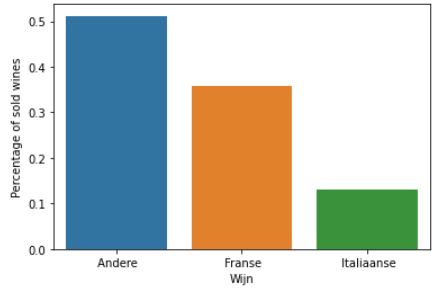

<Axes: xlabel='Wijn', ylabel='Geen'>

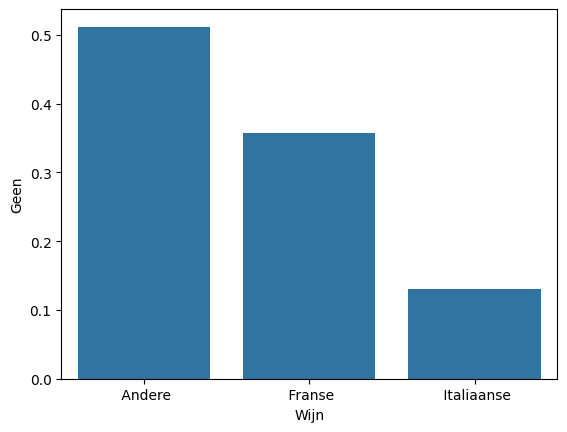

In [ ]:
#Alle verkopen zonder muziek
sns.barplot(x=observed.loc['Geen'].index, y=observed.loc['Geen'] / np.sum(observed.loc['Geen']))

<Axes: xlabel='Muziek'>

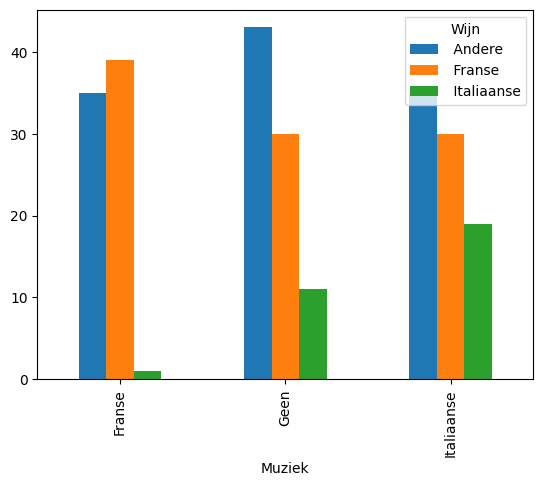

In [10]:
observed = pd.crosstab(df.Muziek,df.Wijn)

observed.plot(kind='bar', stacked=False)

Plot a clustered bar chart of the dataset  

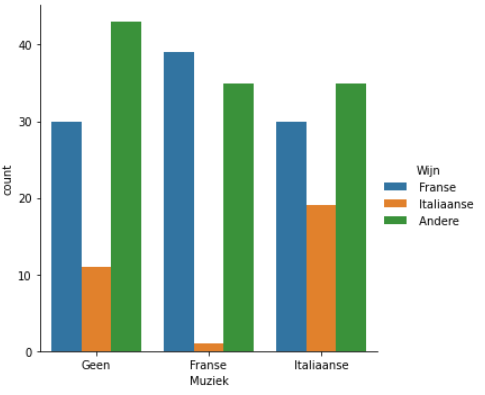

<Axes: ylabel='Muziek'>

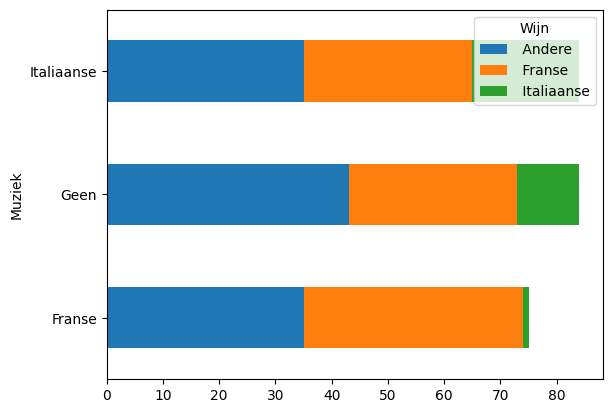

In [8]:
observed = pd.crosstab(df.Muziek,df.Wijn)

observed.plot(kind='barh', stacked=True)

Plot a bar chart (stacked bar chart) of the dataset

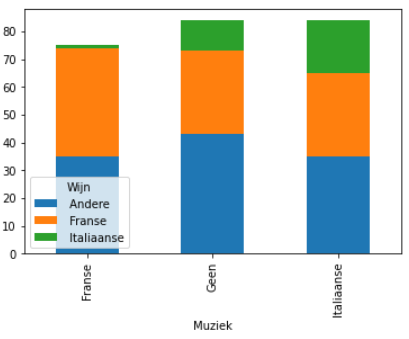

<Axes: xlabel='Muziek'>

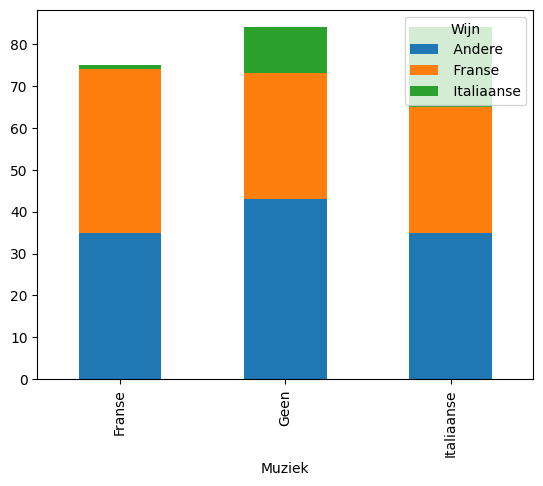

In [9]:
observed = pd.crosstab(df.Muziek,df.Wijn)

observed.plot(kind='bar', stacked=True)